In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression

df = pd.read_csv("cars.csv")

X = df[['Weeks']]

y = df['Total']

model = LinearRegression()

model.fit(X, y)

print('Intercept:', round(model.intercept_, 2))
print('Coefficients:', round(model.coef_[0]))

Intercept: 115.99
Coefficients: 1


In [3]:
y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from math import sqrt

print ('MSE :', mean_squared_error(y_pred, y))
print ('RMSE :', sqrt(mean_squared_error(y_pred, y)))
print ('MAE :', mean_absolute_error(y_pred, y))

MSE : 1915.7821203188573
RMSE : 43.76964839153791
MAE : 37.40842605663041


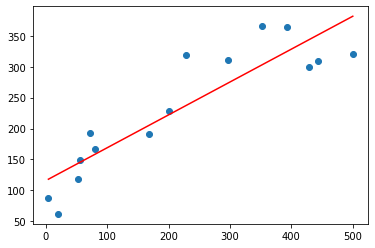

In [4]:
df['prediction'] = model.predict(X)

import matplotlib.pyplot as plt

xpoints = df['Weeks']
ypoints = df['Total']
ypredpoints = df['prediction']

plt.scatter(xpoints, ypoints)
plt.plot(xpoints, ypredpoints, color='red')

plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2, include_bias=False)

XNew = polynomial.fit_transform(X)

print(XNew)

[[4.00000e+00 1.60000e+01]
 [2.00000e+01 4.00000e+02]
 [5.20000e+01 2.70400e+03]
 [5.60000e+01 3.13600e+03]
 [7.20000e+01 5.18400e+03]
 [8.00000e+01 6.40000e+03]
 [1.68000e+02 2.82240e+04]
 [2.00000e+02 4.00000e+04]
 [2.28000e+02 5.19840e+04]
 [2.96000e+02 8.76160e+04]
 [3.52000e+02 1.23904e+05]
 [3.92000e+02 1.53664e+05]
 [4.28000e+02 1.83184e+05]
 [4.44000e+02 1.97136e+05]
 [5.00000e+02 2.50000e+05]]


In [6]:
model2 = LinearRegression()

model2.fit(XNew, y)

print('Intercept:', model2.intercept_)
print('Coefficients:', model2.coef_)

Intercept: 65.98710740550425
Coefficients: [ 1.33308721 -0.00166673]


In [7]:
y_pred2 = model2.predict(XNew)

print ('MSE :', mean_squared_error(y_pred2, y))
print ('RMSE :', sqrt(mean_squared_error(y_pred2, y)))
print ('MAE :', mean_absolute_error(y_pred2, y))

MSE : 812.2825725792529
RMSE : 28.500571443029926
MAE : 24.62724256032612


    Weeks  Total  prediction  prediction2
0       4     88  118.120194    71.292788
1      20     62  126.621170    91.982158
2      52    118  143.623121   130.800793
3      56    149  145.748365   135.413113
4      72    193  154.249341   153.329037
5      80    167  158.499829   161.966986
6     168    192  205.255195   242.903857
7     200    229  222.257146   265.935188
8     228    319  237.133854   283.287489
9     296    311  273.263000   314.548352
10    352    366  303.016415   328.718791
11    392    365  324.268854   332.440274
12    428    300  343.396050   331.229425
13    444    310  351.897025   329.304547
14    500    320  381.650440   315.847202


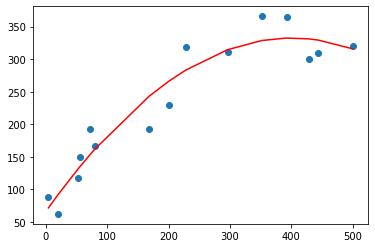

In [9]:
df['prediction2'] = model2.predict(XNew)
print(df)

xpoints = df['Weeks']
ypoints = df['Total']
ypredpoints2 = df['prediction2']

plt.plot(xpoints, ypredpoints2, color='red')
plt.scatter(xpoints, ypoints)
plt.show()

In [10]:
weeks = [[510]]

weeksNew = polynomial.fit_transform(weeks)

ypred = model2.predict(weeksNew)
print(ypred)

[312.34406067]


In [11]:
ypred = model2.intercept_ + model2.coef_[0] * weeks[0][0] + model2.coef_[1] * weeks[0][0] * weeks[0][0]
print(ypred)

312.34406067259295
